In [34]:
import numpy as np
import gym
import simpful as sf
import matplotlib.pyplot as plt

FS = sf.FuzzySystem()

low = sf.FuzzySet(function=sf.Trapezoidal_MF(a=-1, b=-0.75, c=-0.25, d=0), term="low")
zero = sf.FuzzySet(function=sf.Triangular_MF(a=-0.35, b=0, c=0.35), term="zero")
high = sf.FuzzySet(function=sf.Trapezoidal_MF(a=0, b=0.25, c=0.75, d=1), term="high")
lv_x = sf.LinguisticVariable([low, zero, high], universe_of_discourse=[-1, 1])
FS.add_linguistic_variable("X", lv_x)

right = sf.FuzzySet(function=sf.Trapezoidal_MF(a=-1, b=-0.75, c=-0.25, d=0), term="right")
zero = sf.FuzzySet(function=sf.Triangular_MF(a=-0.9, b=0, c=0.9), term="zero")
left = sf.FuzzySet(function=sf.Trapezoidal_MF(a=0, b=0.25, c=0.75, d=1), term="left")
lv_y = sf.LinguisticVariable([left, zero, right], universe_of_discourse=[-1, 1])
FS.add_linguistic_variable("Y", lv_y)

negative_velocity = sf.FuzzySet(function=sf.Triangular_MF(a=-8, b=-8, c=0), term="negative")
zero_velocity = sf.FuzzySet(function=sf.Triangular_MF(a=-8, b=0, c=8), term="zero")
positive_velocity = sf.FuzzySet(function=sf.Triangular_MF(a=0, b=8, c=8), term="positive")
lv_velocity = sf.LinguisticVariable([negative_velocity, zero_velocity, positive_velocity], universe_of_discourse=[-8, 8])
FS.add_linguistic_variable("Velocity", lv_velocity)

negative = sf.FuzzySet(function=sf.Triangular_MF(a=-2, b=-2, c=0), term="negative")
zero = sf.FuzzySet(function=sf.Triangular_MF(a=-2, b=0, c=2), term="zero")
positive = sf.FuzzySet(function=sf.Triangular_MF(a=0, b=2, c=2), term="positive")
lv_force = sf.LinguisticVariable([negative, zero, positive], universe_of_discourse=[-2, 2])
FS.add_linguistic_variable("Force", lv_force)
# super_negative = sf.FuzzySet(function=sf.Triangular_MF(a=-2, b=-2, c=-1), term="super_negative")
# negative = sf.FuzzySet(function=sf.Triangular_MF(a=-2, b=-1, c=0), term="negative")
# zero = sf.FuzzySet(function=sf.Triangular_MF(a=-1.5, b=0, c=1.5), term="zero")
# positive = sf.FuzzySet(function=sf.Triangular_MF(a=0, b=1, c=2), term="positive")
# super_positive =  sf.FuzzySet(function=sf.Triangular_MF(a=1, b=2, c=2), term="super_positive")
# lv_force = sf.LinguisticVariable([super_negative, negative, zero, positive, super_positive], universe_of_discourse=[-2, 2])
# FS.add_linguistic_variable("Force", lv_force)

# co sie dzieje gdy wahadło jest w pozycji pionowej na górze
R1 = " IF (Y IS zero) AND (X IS high) AND (Velocity IS zero) THEN (Force IS zero)"
R2 = " IF (Y IS zero) AND (X IS high) AND (Velocity IS negative) THEN (Force IS super_positive)"
R3 = " IF (Y IS zero) AND (X IS high) AND (Velocity IS positive) THEN (Force IS super_negative)"

# co sie dzieje gdy wahadło jest w pozycji pionowej na górze
R1 = " IF (Y IS zero) AND (X IS high) AND (Velocity IS zero) THEN (Force IS zero)"
R2 = " IF (Y IS zero) AND (X IS high) AND (Velocity IS negative) THEN (Force IS positive)"
R3 = " IF (Y IS zero) AND (X IS high) AND (Velocity IS positive) THEN (Force IS negative)"

# co sie dzieje gdy wahadło jest na dole
R4 = "IF (Y IS left) AND (X IS zero) AND (Velocity IS zero) THEN (Force IS positive)" # na dole po lewej, pcham w prawo
R5 = "IF (Y IS right) AND (X IS zero) AND (Velocity IS zero) THEN (Force IS negative)" # na dole po prawej, pcham w lewo

R6 = "IF (Y IS left) AND (Velocity IS positive) THEN (Force IS positive)"
R7 = "IF (Y IS right) AND (Velocity IS negative) THEN (Force IS negative)"

# R8 = "IF (X IS high) AND (Velocity IS negative) THEN (Force IS positive)"
# R9 = "IF (X IS high) AND (Velocity IS positive) THEN (Force IS negative)"

FS.add_rules([R1, R2, R3, R4, R5, R6, R7])

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful



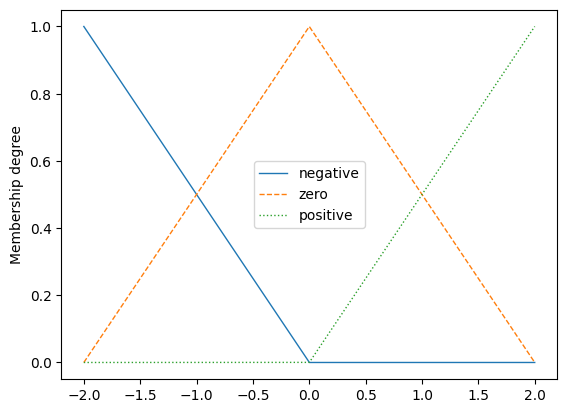

In [35]:
lv_force.plot()
plt.show()

In [36]:
env = gym.make('Pendulum-v1', render_mode="human")

# Simulate the system
observation, info = env.reset(seed=42)
action = env.action_space.sample()
observation, reward, terminated, truncated, info = env.step(action)

for _ in range(6000):
    x, y, v = observation
    
    # Set the fuzzy inputs
    FS.set_variable("X", x)
    FS.set_variable("Y", y)
    FS.set_variable("Velocity", v)
    
    # Perform inference and get the output
    force = FS.inference()["Force"]
    print(x, y, v, force)
    
    # Apply the force to the environment
    observation, reward, terminated, truncated, info = env.step([force])
    
    if terminated or truncated:
        break

env.close()

/home/agata/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


-0.19455771 0.98089105 0.90572464 1.038711743815382
-0.28179702 0.959474 1.7971997 1.0796718560092444
-0.40739912 0.9132502 2.678756 1.1572134402467837
-0.56172395 0.82732475 3.5372758 1.2011904491460168
-0.72660357 0.68705696 4.337948 1.238551416522867
-0.8749423 0.48422718 5.0390234 1.2677477396613075
-0.97460145 0.22394644 5.5923557 1.288015304734688
-0.99742246 -0.071752295 5.953518 0
-0.93348 -0.35862938 5.8997035 0
-0.7970899 -0.6038607 5.6307316 0
-0.6159322 -0.7877991 5.177836 0
-0.42070237 -0.9071987 4.5869865 0
-0.23662432 -0.97160125 3.9065878 -1.056657890181086
-0.08780739 -0.9961375 3.0193882 -1.0086950790899636
0.018127432 -0.99983567 2.1209807 -1.001001001001001
0.07909342 -0.9968672 1.2209538 -1.00724221184974
0.09514284 -0.9954636 0.3222171 -1.010045011069354
0.06644362 -0.99779016 -0.5758874 -1.0053747541060116
-0.0072591417 -0.99997365 -1.4750363 -1.0010010010010009
-0.12568426 -0.9920703 -2.3751667 -1.016773080653564
-0.28557304 -0.958357 -3.2717352 -1.0817664118632

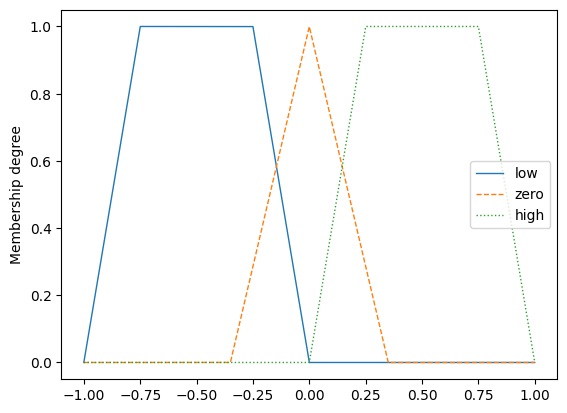

In [87]:
lv_x.plot()
plt.show()

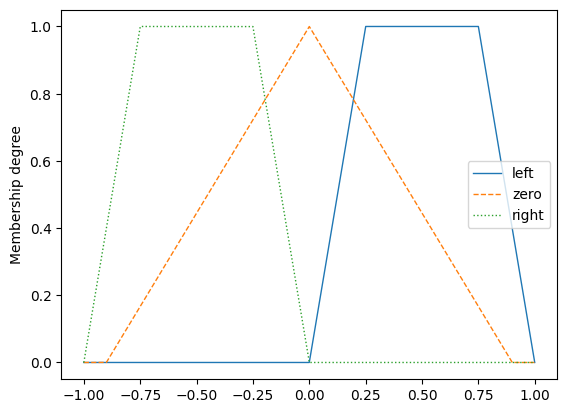

In [88]:
lv_y.plot()
plt.show()

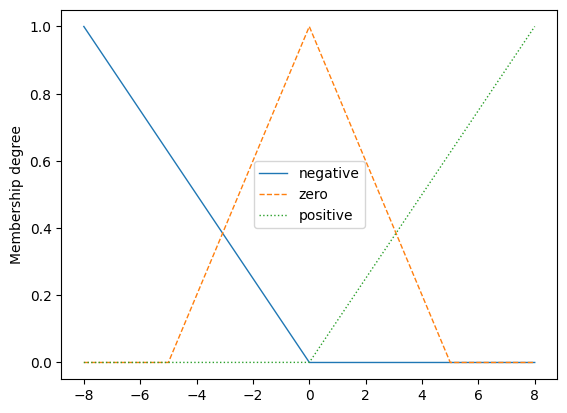

In [89]:
lv_velocity.plot()
plt.show()

In [7]:
import gym

env = gym.make("Pendulum-v1", render_mode="human")
observation, info = env.reset(seed=42)

for i in range(500):
   action = env.action_space.sample()
   action = [1]
   observation, reward, terminated, truncated, info = env.step(action)
   print(observation)
 
   if terminated or truncated:
      observation, info = env.reset(seed=42)
env.close()

/home/agata/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[-0.1878612   0.98219556  0.7692768 ]
[-0.26844683  0.9632945   1.6559235 ]
[-0.38775983  0.92176044  2.5283945 ]
[-0.5368388  0.8436848  3.3697147]
[-0.69922274  0.7149039   4.152478  ]
[-0.85013545  0.52656406  4.8386564 ]
[-0.95955616  0.28151718  5.3835793 ]
[-9.9999827e-01 -1.8609735e-03  5.7447171e+00]
[-0.95635706 -0.2922006   5.8933215 ]
[-0.8321984 -0.554478   5.824171 ]
[-0.64814436 -0.7615175   5.5583124 ]
[-0.43342188 -0.9011911   5.137174  ]
[-0.2160063 -0.976392   4.611281 ]
[-0.01627227 -0.9998676   4.028987  ]
[ 0.15455925 -0.9879835   3.4290862 ]
[ 0.29273534 -0.9561935   2.8380988 ]
[ 0.39919063 -0.916868    2.2709537 ]
[ 0.4770535  -0.87887424  1.7333026 ]
[ 0.52992016 -0.84804755  1.2241468 ]
[ 0.5608499  -0.8279175   0.73811126]
[ 0.57185936 -0.82035166  0.2671731 ]
[ 0.5637063  -0.82597536 -0.19809066]
[ 0.53582746 -0.8443275  -0.66757214]
[ 0.48638412 -0.8737451  -1.1508178 ]
[ 0.41244856 -0.9109809  -1.6561266 ]
[ 0.31045547 -0.9505879  -2.1893623 ]
[ 0.17711762